In [1]:
import pandas as pd
df_playlist = pd.read_csv("../data/track_playlist_association.csv")
df_tracks = pd.read_csv("../data/matched_songs.csv")


=== Top 10 Closest Tracks ===

#1: help (feat. Maejor)
  Artists: blackbear, Maejor
  Album: Help
  Track URI: spotify:track:0IHjY58S1OdnealEbadJQ1

#2: paragraphs
  Artists: blackbear
  Album: Help
  Track URI: spotify:track:49GFP1sA528wDMaDdQgwLo

#3: nervous
  Artists: blackbear
  Album: Help
  Track URI: spotify:track:0FkKoIRproCB2faGlpPtry

#4: different hos
  Artists: blackbear
  Album: Help
  Track URI: spotify:track:2Y4DwuII6ZzFZxmvD1s5o5

#5: oh lord
  Artists: blackbear
  Album: Help
  Track URI: spotify:track:1i6eoKAP8V6kVeW5FHxW8q

#6: verbatim
  Artists: blackbear
  Album: Help
  Track URI: spotify:track:3CEyM9wliTj7TeuuG84KZU

#7: Stampede
  Artists: YEAR OF THE OX
  Album: YOX EP
  Track URI: spotify:track:1WQJqbtfyvDaR4ktWKYVKP

#8: Pathetic
  Artists: Erik Hassle
  Album: Innocence Lost
  Track URI: spotify:track:3kC6803yj2CXjYsNDUkpLM

#9: 4u
  Artists: blackbear
  Album: Deadroses
  Track URI: spotify:track:1XcXhu1X0xBFMDFyq0b7Ue

#10: dirty laundry
  Artists: black

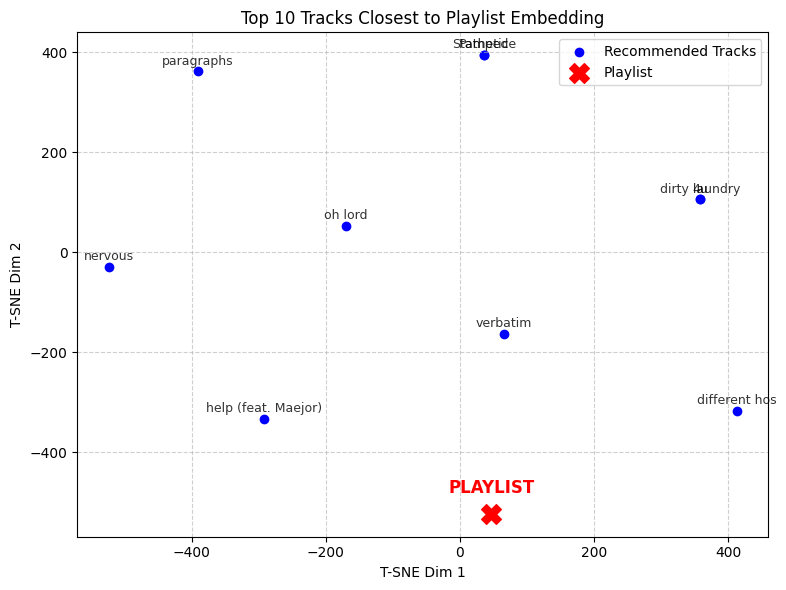

In [2]:
from adv_ml_music_recommendation.recommenders.hybridrecommender import HybridRecommender

recommender = HybridRecommender(df_playlist=df_playlist, df_tracks=df_tracks)

# Get the top 10 recommended tracks for a specific playlist
playlist_id = 10 # Replace with the playlist_id for which you want recommendations
top_k = 10  # Number of tracks to recommend

playlist_embedding = recommender.content_recommender.construct_playlist_embedding(playlist_id)
recommender.content_recommender.visualize_embedding(playlist_embedding)



=== Top 50 Closest Tracks ===

#1: Adrenaline Nightshift
  Artists: Japandroids
  Album: Celebration Rock
  Track URI: spotify:track:0sq6L0pQRdMCnQ5N76U4AJ

#2: Evil's Sway
  Artists: Japandroids
  Album: Celebration Rock
  Track URI: spotify:track:0cMeyVzzSstLgkxMBcu2G5

#3: Fire's Highway
  Artists: Japandroids
  Album: Celebration Rock
  Track URI: spotify:track:7pjyI9ulr1P3xR2JtFp3IG

#4: Ezekiel
  Artists: Pomegranates
  Album: Heaven
  Track URI: spotify:track:1SNJoL6GiMPlDfHjJTRTN2

#5: Heaven
  Artists: Pomegranates
  Album: Heaven
  Track URI: spotify:track:0pTvxZM3ffLXvLT8mBZgaR

#6: Younger Us
  Artists: Japandroids
  Album: Celebration Rock
  Track URI: spotify:track:5lLyaFsXQ2GASksFhGA9It

#7: Continuous Thunder
  Artists: Japandroids
  Album: Celebration Rock
  Track URI: spotify:track:1WTMcJpdYwVeXOaqG3X68E

#8: For the Love of Ivy
  Artists: Japandroids
  Album: Celebration Rock
  Track URI: spotify:track:7oAtwYnc4LQqjZYcCC5Yub

#9: The House That Heaven Built
  Artist

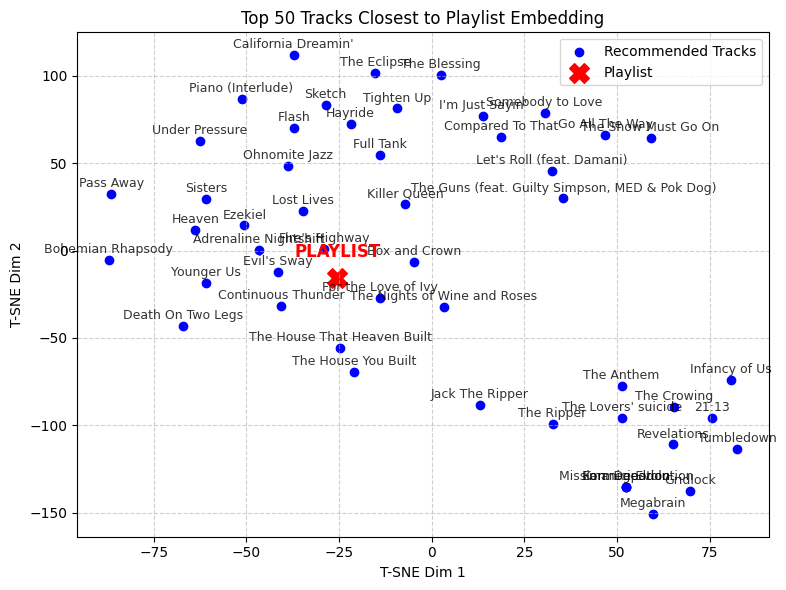

In [3]:
playlist_embedding = recommender.content_recommender.construct_playlist_embedding(30)
recommender.content_recommender.visualize_embedding(playlist_embedding, top_n=50)